<a href="https://colab.research.google.com/github/thiagomacielbarbosa/data-engineer-analytics/blob/main/Habita%C3%A7%C3%B5es_California_GH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California_housing_train.

In [ ]:
from google.colab import files
import pandas as pd
import io

In [ ]:
uploaded = files.upload()

Saving california_housing_train.csv to california_housing_train.csv


In [ ]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print("✅ Arquivo carregado com sucesso!")
print(f"📊 Dimensões do dataset: {df.shape}")

✅ Arquivo carregado com sucesso!
📊 Dimensões do dataset: (17000, 9)


In [ ]:

print("👀 Primeiras 5 linhas do dataset:")
display(df.head())

print("\n📋 Estrutura do dataset:")
df.info()


print("\n📈 Estatísticas descritivas:")
display(df.describe())

👀 Primeiras 5 linhas do dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0



📋 Estrutura do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB

📈 Estatísticas descritivas:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:

print("🔍 Valores nulos por coluna:")
null_count = df.isnull().sum()
display(null_count[null_count > 0])

if df.isnull().sum().sum() > 0:

    df = df.fillna(df.median())
    print("✅ Valores nulos tratados!")
else:
    print("🎉 Não há valores nulos no dataset!")

🔍 Valores nulos por coluna:


,0


🎉 Não há valores nulos no dataset!


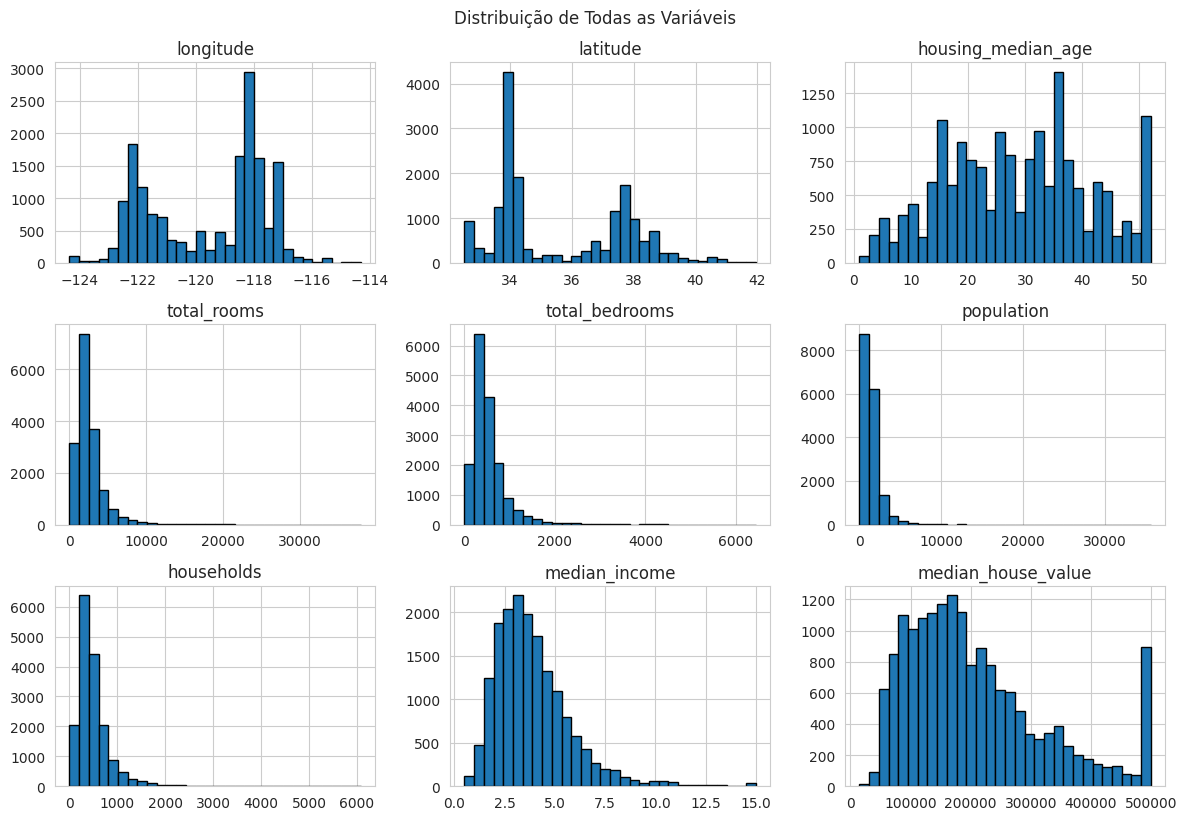

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


df.hist(bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribuição de Todas as Variáveis', y=1.02)
plt.show()

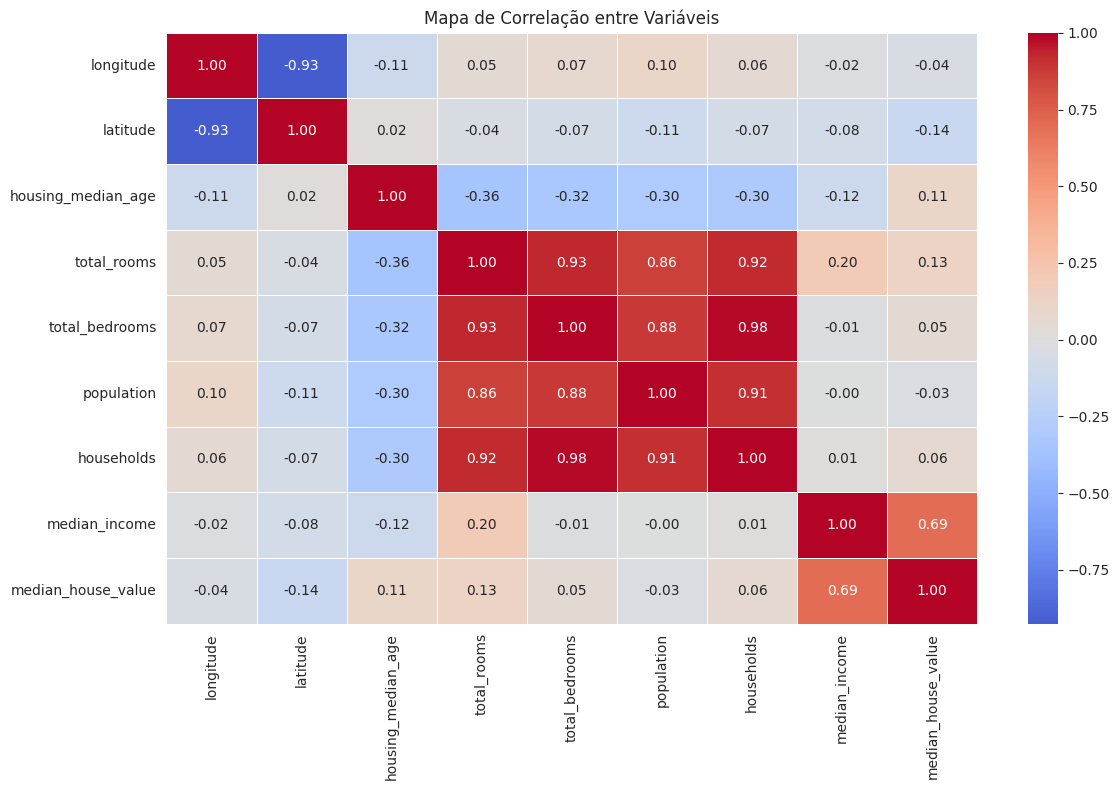

In [ ]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

if 'MedHouseVal' in df.columns:
    print("🔗 Correlações com MedHouseVal:")
    correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
    display(correlations)

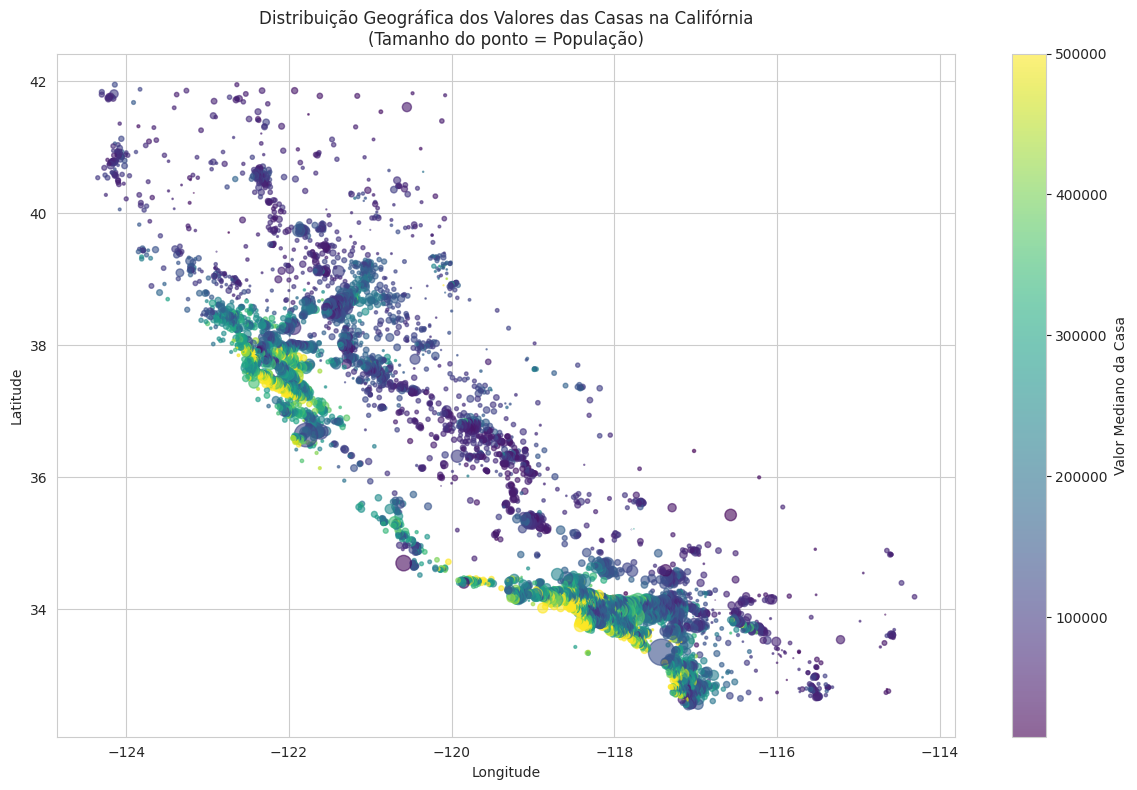

In [ ]:
# Mapa de dispersão geográfica dos preços das casas
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['longitude'], df['latitude'],
                      c=df['median_house_value'], cmap='viridis',
                      alpha=0.6, s=df['population']/100)
plt.colorbar(scatter, label='Valor Mediano da Casa')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição Geográfica dos Valores das Casas na Califórnia\n(Tamanho do ponto = População)')
plt.tight_layout()
plt.show()

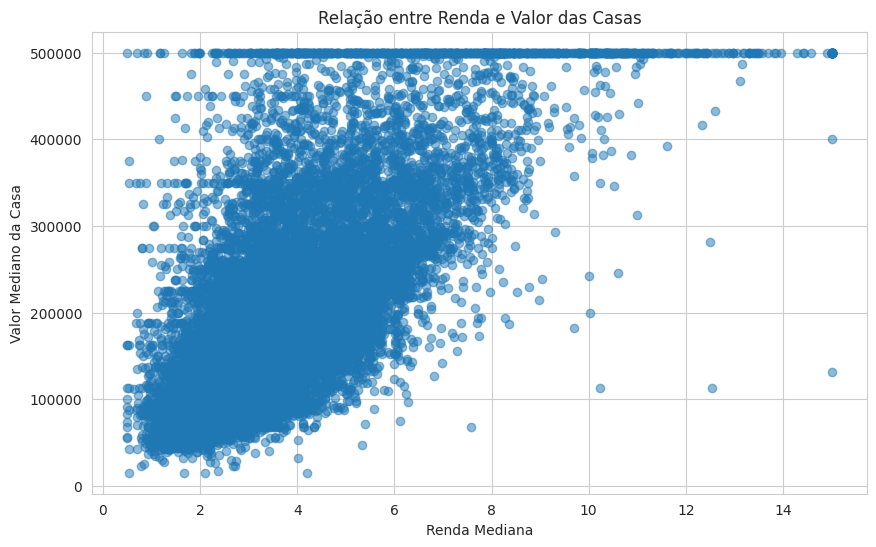

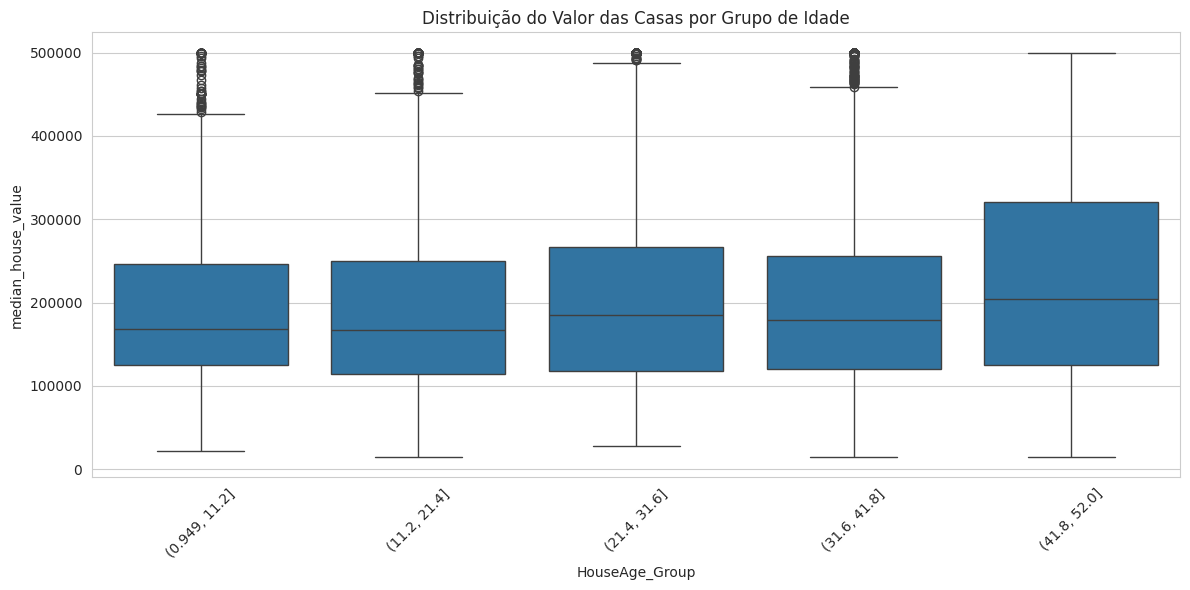

In [ ]:
# Relação entre renda e valor da casa
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel('Renda Mediana')
plt.ylabel('Valor Mediano da Casa')
plt.title('Relação entre Renda e Valor das Casas')
plt.grid(True)
plt.show()

# Boxplot: valor da casa por idade da casa
plt.figure(figsize=(12, 6))
df['HouseAge_Group'] = pd.cut(df['housing_median_age'], bins=5)
sns.boxplot(data=df, x='HouseAge_Group', y='median_house_value')
plt.title('Distribuição do Valor das Casas por Grupo de Idade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Pergunta** 1: Qual variável tem maior correlação com o valor das casas?

In [ ]:
if 'median_house_value' in df.columns:

    df_numeric = df.drop(columns=['HouseAge_Group'], errors='ignore')
    strongest_corr = df_numeric.corr()['median_house_value'].abs().sort_values(ascending=False).index[1]
    correlation_value = df_numeric.corr()['median_house_value'][strongest_corr]
    print(f"📊 A variável com maior correlação com 'median_house_value' é '{strongest_corr}' com {correlation_value:.3f}")

📊 A variável com maior correlação com 'median_house_value' é 'median_income' com 0.692


# Pergunta 2: Como a localização geográfica influencia o preço?


In [ ]:
# Análise geográfica
coastal_areas = df[(df['longitude'] < -118) & (df['latitude'] > 33)]
inland_areas = df[(df['longitude'] >= -118) | (df['latitude'] <= 33)]

coastal_avg_price = coastal_areas['median_house_value'].mean()
inland_avg_price = inland_areas['median_house_value'].mean()

print(f"🏖️  Preço médio em áreas costeiras: ${coastal_avg_price:.2f}")
print(f"🌳 Preço médio em áreas interioranas: ${inland_avg_price:.2f}")
print(f"💰 Diferença: ${(coastal_avg_price - inland_avg_price):.2f}")

🏖️  Preço médio em áreas costeiras: $212522.61
🌳 Preço médio em áreas interioranas: $191748.24
💰 Diferença: $20774.37


# Pergunta 3: Existem outliers(ponto fora da curva ou valor atípico)nas variáveis principais?

In [ ]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

print("📊 Outliers detectados por coluna:")

columns_to_check = ['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households']
for column in columns_to_check:
    if column in df.columns:
        outliers_count = detect_outliers(df[column])
        print(f"   {column}: {outliers_count} outliers")
    else:
        print(f"   Coluna '{column}' não encontrada no dataset.")

📊 Outliers detectados por coluna:
   median_income: 563 outliers
   total_rooms: 1076 outliers
   total_bedrooms: 1074 outliers
   population: 1015 outliers
   households: 1032 outliers


# **Pergunta** 4: Qual o perfil das casas mais valorizadas?

In [ ]:
# Análise das casas de alto valor
high_value_threshold = df['median_house_value'].quantile(0.75)
high_value_houses = df[df['median_house_value'] > high_value_threshold]

print("🏠 Perfil das Casas de Alto Valor:")
print(f"   • Renda mediana média: ${high_value_houses['median_income'].mean():.2f}")
print(f"   • Idade média das casas: {high_value_houses['housing_median_age'].mean():.1f} anos")
print(f"   • Média de cômodos: {high_value_houses['total_rooms'].mean():.1f}")
print(f"   • População média: {high_value_houses['population'].mean():.0f} pessoas")

🏠 Perfil das Casas de Alto Valor:
   • Renda mediana média: $5.71
   • Idade média das casas: 30.5 anos
   • Média de cômodos: 3049.9
   • População média: 1341 pessoas


In [ ]:
df.to_csv('/content/california_housing_processed.csv', index=False)


with open('/content/insights_do_projeto.txt', 'w') as f:
    f.write("INSIGHTS DO PROJETO CALIFORNIA HOUSING\n")
    f.write("=" * 50 + "\n\n")
    f.write(f"• Total de amostras analisadas: {len(df):,}\n")
    f.write(f"• Valor médio das casas: ${df['median_house_value'].mean():,.2f}\n")
    f.write(f"• Correlação renda×valor: {df['median_income'].corr(df['median_house_value']):.3f}\n")
    f.write(f"• Faixa de idades das casas: {df['housing_median_age'].min()} - {df['housing_median_age'].max()} anos\n")

print("✅ Análise concluída! Arquivos salvos:")
print("   - california_housing_processed.csv")
print("   - insights_do_projeto.txt")

✅ Análise concluída! Arquivos salvos:
   - california_housing_processed.csv
   - insights_do_projeto.txt
